##**Context**
It is important that credit card companies are able to **recognize fraudulent credit card transactions** so that customers are not charged for items that they did not purchase.


##**Content**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


##**Train Data:**
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

1. **V1, V2, … V28** are the principal components obtained with PC.

The only features which have not been transformed with PCA are 

2. **Time** - contains the seconds elapsed between each transaction and the first transaction in the dataset.
3. **Amount** -Its the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

4. **Class** - is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##**Evaluation Metrics**
Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## **Importing Libraries**

In [1]:
!pip install catboost

     |████████████████████████████████| 69.2MB 44kB/s 


In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

from sklearn.preprocessing import StandardScaler

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Read Data**

In [5]:
train = pd.read_csv("/content/drive/My Drive/Kaggle/CreditCardFraud/creditcard.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **EDA**

In [6]:
print("Total no of records present in data is {} and total no of features are {}".format(train.shape[0],train.shape[1]))

Total no of records present in data is 284807 and total no of features are 31


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## **Data Visualization**

In [9]:
numericalData = train.columns
numericalData

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

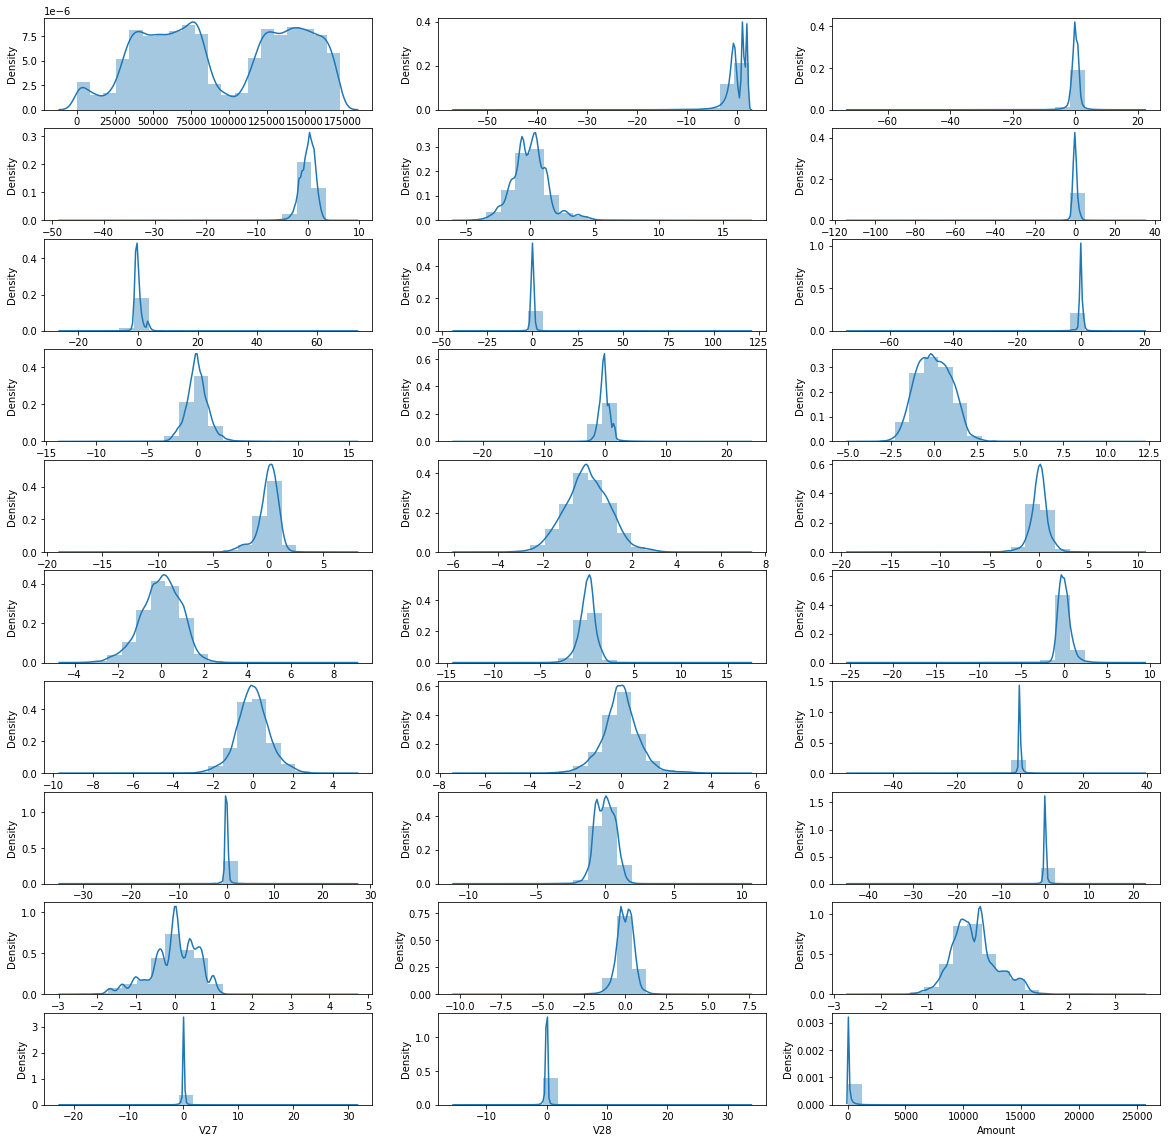

In [10]:
fig, ax = plt.subplots(10, 3, figsize=(20,20))
for column, subplot in zip(numericalData, ax.flatten()):
  sns.distplot(train[column], bins=20, ax=subplot)

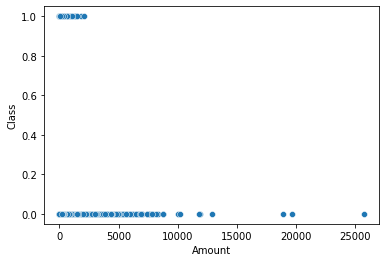

In [11]:
sns.scatterplot(x='Amount', y='Class', data=train)

In [12]:
print(train[train['Amount'] > 9000].shape)

(8, 31)


In [13]:
train = train[train['Amount'] < 9000]
train.reset_index(inplace= True, drop= True)
print(train.shape)

(284799, 31)


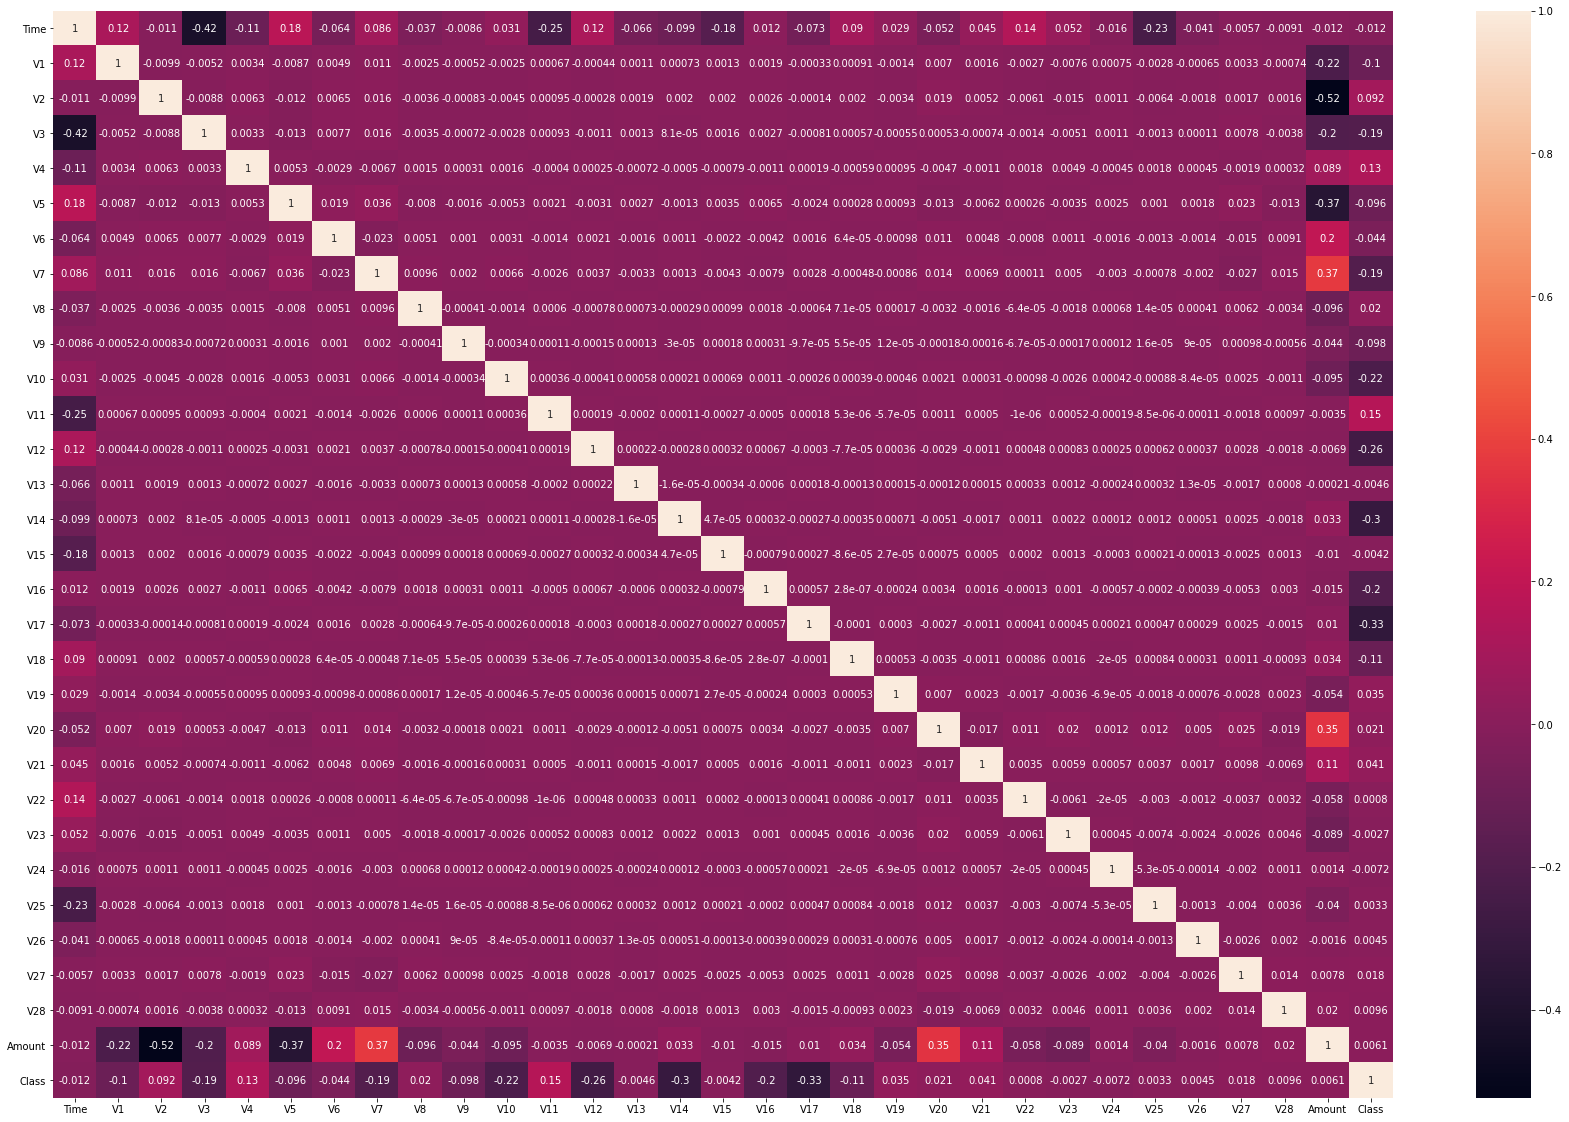

In [14]:
plt.figure(figsize = (30,20))
corr = train.corr()
sns.heatmap(corr, annot=True)

## **Data Preprocessing**

In [15]:
train.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [16]:
train.duplicated().any()

True

In [17]:
newTrain = train.copy()
totalRecord = newTrain.shape[0]
print("No or records before deleting the duplicates: ", totalRecord)
newTrain.drop_duplicates(inplace= True)
newTrain.reset_index(drop=True)
finalTotalRecord = newTrain.shape[0]
print("No or records after deleting the duplicates: ", finalTotalRecord, "\n")
print("TOtal No of records deleted: {}".format(totalRecord-finalTotalRecord))

No or records before deleting the duplicates:  284799
No or records after deleting the duplicates:  283718 

TOtal No of records deleted: 1081


## **Check Balanced or Unbalanced Data**

In [18]:
newTrain['Class'].value_counts()

0    283245
1       473
Name: Class, dtype: int64

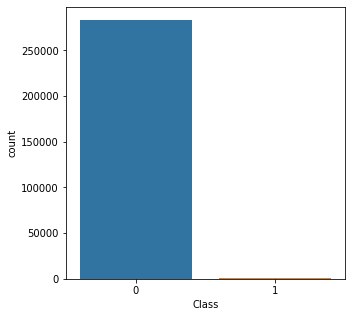

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(newTrain['Class'])

In [20]:
print("Percentage of Fraud cases: {}".format((newTrain.Class.value_counts()[1]/finalTotalRecord)*100))
print("Percentage of Non Fraud cases: {}".format((newTrain.Class.value_counts()[0]/finalTotalRecord)*100))

Percentage of Fraud cases: 0.16671483656306613
Percentage of Non Fraud cases: 99.83328516343694


## **Separating feature and label**

In [21]:
features = newTrain.drop(['Class'], axis=1)
label = newTrain['Class']

## **Balancing Data using SMOTE**

In [59]:
seed = 42
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.25,
                                                random_state = seed)

In [60]:
print("Count of 1 class in training set before upsampling :" ,(sum(y_train==1)))
print("Count of 0 class in training set before upsampling :",(sum(y_train==0)))

Count of 1 class in training set before upsampling : 360
Count of 0 class in training set before upsampling : 212428


In [61]:
smote = SMOTE(sampling_strategy ='auto'  ,k_neighbors = 2, random_state=42, n_jobs=2)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

In [62]:
print("Count of 1 class in training set after upsampling  :" ,(sum(y_train_sampled==1)))
print("Count of 0 class in training set after upsampling  :",(sum(y_train_sampled==0)))

Count of 1 class in training set after upsampling  : 212428
Count of 0 class in training set after upsampling  : 212428


## **Standard Scaling the data**

In [63]:
scalar = StandardScaler()
X_train_sampled = scalar.fit_transform(X_train_sampled)
X_test = scalar.transform(X_test)

## **Model Building**

### **Logistic Regression**

In [64]:
lr = LogisticRegression()
modelLR = lr.fit(X_train_sampled,y_train_sampled)
print("Train Score: ", modelLR.score(X_train_sampled,y_train_sampled))
print("Test Score: ", modelLR.score(X_test,y_test))

#print(modelLR.predict_proba(X_test)[:,1])

Train Score:  0.9780914003803641
Test Score:  0.9903425912871845


In [ ]:
 y_pred = modelLR.predict(X_test)
 score = accuracy_score(y_test, y_pred )
 recallScore = recall_score(y_test, y_pred )
 print("Accuracy Score: ",score, "\n", "Recall Score: ",recallScore)

0.9628335329212612


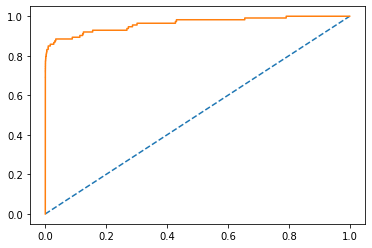

In [65]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelLR.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [66]:
confusion_matrix(y_test,modelLR.predict(X_test))

array([[70150,   667],
       [   18,    95]])

In [67]:
print(classification_report(y_test,modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70817
           1       0.12      0.84      0.22       113

    accuracy                           0.99     70930
   macro avg       0.56      0.92      0.61     70930
weighted avg       1.00      0.99      0.99     70930



### **LightGBM**

In [68]:
lgbclf = LGBMClassifier(n_jobs=-1,
                        random_state=32,
                        objective='binary',
                        reg_lambda = 1,
                        reg_alpha= 1,
                        n_estimators=600,
                        min_child_weight=1,
                        max_depth=5,
                        learning_rate= 0.02, 
                        num_leaves=30)

lgbclf.fit(X_train_sampled,y_train_sampled)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=5,
               min_child_samples=20, min_child_weight=1, min_split_gain=0.0,
               n_estimators=600, n_jobs=-1, num_leaves=30, objective='binary',
               random_state=32, reg_alpha=1, reg_lambda=1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [69]:
 y_pred = lgbclf.predict(X_test)
 score = accuracy_score(y_test, y_pred )
 recallScore = recall_score(y_test, y_pred )
 print("Accuracy Score: ",score, "\n", "Recall Score: ",recallScore)

Accuracy Score:  0.9984632736500776 
 Recall Score:  0.8053097345132744


0.9748019355884373


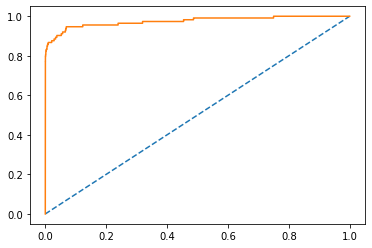

In [70]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = lgbclf.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [71]:
predlabel= lgbclf.predict(X_test)
confusion_matrix(y_test,predlabel)

array([[70730,    87],
       [   22,    91]])

In [72]:
print(classification_report(y_test,lgbclf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70817
           1       0.51      0.81      0.63       113

    accuracy                           1.00     70930
   macro avg       0.76      0.90      0.81     70930
weighted avg       1.00      1.00      1.00     70930



## **SMOTE + ENN**

In [81]:
sm = SMOTE(sampling_strategy ='auto',
              k_neighbors = 2, 
              random_state=42,
              n_jobs=2)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [82]:
enn = EditedNearestNeighbours(sampling_strategy='auto',
                              n_neighbors=3,
                              kind_sel= 'all',
                              n_jobs=2)

In [86]:
smoteen = SMOTEENN(sampling_strategy='auto',
                   random_state = 42,
                   smote = sm,
                   enn = enn
                   )

X_smenn, y_smenn = smoteen.fit_resample(X_train, y_train)

### **Logistic Regression**

In [87]:
lr = LogisticRegression()
modelLR = lr.fit(X_smenn,y_smenn)
print("Train Score: ", modelLR.score(X_smenn,y_smenn))
print("Test Score: ", modelLR.score(X_test,y_test))

#print(modelLR.predict_proba(X_test)[:,1])

Train Score:  0.9565684951418449
Test Score:  0.9992668828422389


0.9697252834521385


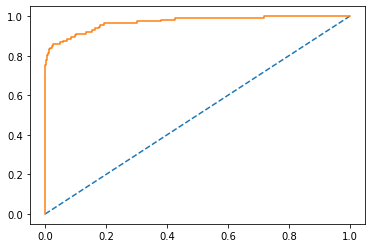

In [88]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelLR.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [89]:
confusion_matrix(y_test,modelLR.predict(X_test))

array([[70799,    18],
       [   34,    79]])

In [90]:
print(classification_report(y_test,modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70817
           1       0.81      0.70      0.75       113

    accuracy                           1.00     70930
   macro avg       0.91      0.85      0.88     70930
weighted avg       1.00      1.00      1.00     70930



### **Hyperparameter Tuning**

In [91]:
learning_rate = [.001,.01,1]
n_estimators = range(20,81,10)
max_depth = range(5,16,2)
min_samples_split = range(1000,2500,200)
subsample= [0.85]
random_state= [32]
max_features = range(7,20,2)

paramGrid = dict(learning_rate=learning_rate,  n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
                 subsample= subsample, random_state=random_state, max_features=max_features)

modelGBC = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(modelGBC,
                   param_distributions=paramGrid,
                   cv = 3) #Same as cross_val_score

In [ ]:
%%time

grid.fit(X_train_sampled,y_train_sampled)

In [ ]:
grid.best_score_

0.8038065553551679

In [ ]:
grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=13,
                           max_features=17, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=1400,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=32, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 9,
 'max_features': 17,
 'min_samples_split': 1000,
 'n_estimators': 80,
 'random_state': 32,
 'subsample': 0.85}